## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
number_of_rows=len(df.index)  # the number of rows in the data set 
print('the number of rows in the data frame =' ,number_of_rows)  

the number of rows in the data frame = 294478


c. The number of unique users in the dataset.

In [4]:
number_of_unique_users=df.user_id.nunique()
print('the number of the unique users in the data set =',number_of_unique_users) # the number of unique user in the data set 

the number of the unique users in the data set = 290584


d. The proportion of users converted.

In [5]:
the_users_converted=(df['converted'].value_counts())[1]
The_proportion_of_users_converted=the_users_converted/number_of_unique_users
print('the proportion of the converted users =',The_proportion_of_users_converted)

the proportion of the converted users = 0.121262698566


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
condition_1=df['landing_page']=='new_page'
condition_2=df['group']!='treatment'
condition_3=df['landing_page']!='new_page'
condition_4=df['group']=='treatment'
number_of_time_new_page_and_tretatment_dont_match=df[(condition_1 & condition_2)|(condition_3 & condition_4)].count()[0]
indexes_1=df[(condition_1 & condition_2) |(condition_3 & condition_4)].index
print('number_of_time_new_page_tretatment_dont_match=',number_of_time_new_page_and_tretatment_dont_match)

number_of_time_new_page_tretatment_dont_match= 3893


f. Do any of the rows have missing values?

In [7]:
((df.isnull())==True).sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2=df.drop(indexes_1,inplace=False)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
print('the number of unique users are =',df2.user_id.nunique())

the number of unique users are = 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# check if we have a duplicated value 
print('the number of duplicated users in the data =',((df2.duplicated('user_id',keep='first'))==True).sum())
df2[df2.duplicated('user_id',keep='first')]['user_id']

the number of duplicated users in the data = 1


2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.duplicated('user_id',keep=False)].sort_values(by=['user_id'])

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop_duplicates(subset='user_id', keep='first', inplace=True)
# now check if the duplicated value has dropped 
((df2.duplicated('user_id',keep=False))==True).sum()

0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
def calculate_independent_probability_in_data_Frame(df,column_name,event):
    '''
    variables :
    df: the data frame 
    column_name : the column that contains the data 
    event : the event to be calculated
    return 
     probability_of_event_to_happen 
    '''
    # first calculate the length of the data 
    number_of_columns=len(df)
    # number of users meets the condition
    number_of_event_to_happen=(df[column_name]==event).sum()
    # calculate probability 
    probability_of_event_to_happen=number_of_event_to_happen/number_of_columns
    return (probability_of_event_to_happen)


In [15]:
# calculate probability of users to convert
probability_to_convert_regardless_the_user_group=calculate_independent_probability_in_data_Frame(df2,'converted',event=1)
print('probability of a user to convert regardless of the received page is =',probability_to_convert_regardless_the_user_group)


probability of a user to convert regardless of the received page is = 0.119597087245


In [16]:
def calculate_probability_for_event_in_a_group(df,group_name,group_column_name,event,column_name_event):
    df_group = df[df[group_column_name]==group_name]
    # Compute completion rate
    prob = (df_group[column_name_event]==event).sum()/len(df_group)
    return (prob)

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
probability_of_convertion_given_control_group=calculate_probability_for_event_in_a_group(df2,'control','group',1,'converted')

print('given that the individual was in the control group ,probability of they coverted =',probability_of_convertion_given_control_group)

given that the individual was in the control group ,probability of they coverted = 0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
probability_of_convertion_given_treatment_group=calculate_probability_for_event_in_a_group(df2,'treatment','group',1,'converted')
print('given that the individual was in the treatment group ,probability of they coverted =',probability_of_convertion_given_treatment_group)


given that the individual was in the treatment group ,probability of they coverted = 0.118808065515


d. What is the probability that an individual received the new page?

In [19]:
probability=calculate_independent_probability_in_data_Frame(df2,'landing_page',event='new_page')
print('probability of an individual to receive new page =',probability)

probability of an individual to receive new page = 0.500061944223


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**First from the data we can see that**
* customers in treatment group always have a new page while customers in control group always have an old page .
* To be able to answer this question it is better to look at the standard deviation of the three given probabilities "probability of a customer to convert regardless of the recieved page , the probability of a customer to convert given that he/she in control group and the probability of a customer to convert given that he/she in treatment group .

In [20]:
# make a pandas series with the three probabilities 
df_probabilities=pd.Series({'general convertion':probability_to_convert_regardless_the_user_group,'convertion while in treatment':probability_of_convertion_given_treatment_group,'convertion while in control':probability_of_convertion_given_control_group})
# calculate the standard deviation of our data 
print('the standard deviation of our three probabilities = ',df_probabilities.std())


the standard deviation of our three probabilities =  0.000789119494696


The standard deviation shows that there are no variance here all three probabilities are almost the same add to that almost 50% of the users are new page. that conclude that the number of data we have for new/old page are almost the same and the converting rates are also almost the same so I guess my answer is there is no evidence concluding that the new page treatment leading to more convertion rate 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**The null hypethosis**
the old page convertion rate is equall to or better than the one from the new page .
**$p_{old}$** >= **$p_{new}$**.
**The alternative hypethosis**
the new convertion rate is  better than the one from the old page signigicantly  .
**$p_{old}$** < **$p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [21]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [22]:
#  the success rate regardless of the page 
probability_to_convert_regardless_the_user_group

0.11959708724499628

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [23]:
# the convertion rate under the null hypothesisfor the treatment group 
p_new_null=probability_to_convert_regardless_the_user_group
p_new_null

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [24]:
# the convertion rate under the null hypothesis for the control group 
p_old_null=probability_to_convert_regardless_the_user_group
p_old_null

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [25]:
df_new = df2[df2['group']=='treatment']
n_new=df_new.user_id.nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [26]:
df_old = df2[df2['group']=='control']
n_old=df_old.user_id.nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
new_page_converted=df_new.sample(n_new,replace= True)
p_new=((new_page_converted.converted==1)==True).mean()
p_new


0.11912463010116303

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
old_page_converted=df_new.sample(n_old,replace= True)
p_old=((old_page_converted.converted==1)==True).mean()
p_old

0.119539628563955

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
p_diff=p_new-p_old
p_diff

-0.00041499846279197117

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [31]:
p_diffs=[]
for i in range (10000):
    new_page_converted=df_new.sample(n_new,replace= True)
    p_new=((new_page_converted.converted==1)==True).mean()
    old_page_converted=df_new.sample(n_old,replace= True)
    p_old=((old_page_converted.converted==1)==True).mean()
    p_diffs.append(p_new-p_old)
p_diffs=np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0,0.5,'the number of sample in each bin')

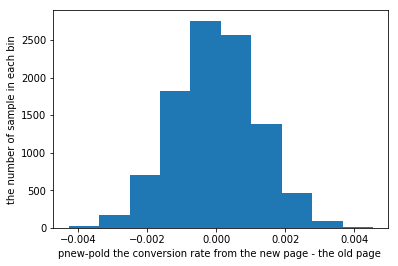

In [32]:
p_diffs=np.array(p_diffs)
plt.hist(p_diffs)
plt.xlabel('pnew-pold the conversion rate from the new page - the old page ')
plt.ylabel('the number of sample in each bin')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

-0.0015782389853555567

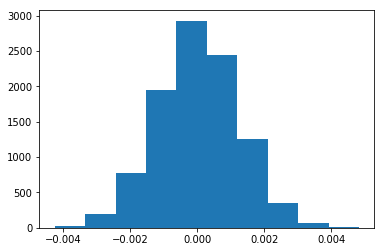

In [33]:
# the difference from the given data 
p_actual_difference=probability_of_convertion_given_treatment_group-probability_of_convertion_given_control_group
# the std of our data 
null_vals = np.random.normal(0,p_diffs.std(),p_diffs.size)

# Plot the null distribution
plt.hist(null_vals)
p_actual_difference

Text(0.5,1,'p value from the null hypothesis with the samples distribution')

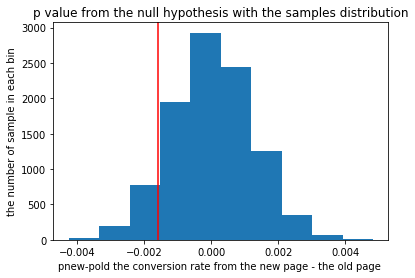

In [37]:
plt.hist(null_vals)
plt.axvline(x=p_actual_difference,color='red')
plt.xlabel('pnew-pold the conversion rate from the new page - the old page ')
plt.ylabel('the number of sample in each bin')
plt.title('p value from the null hypothesis with the samples distribution')

In [35]:
# Compute p-value from the null hypothesis 
print('the p value from the null hypothesis =',(null_vals > p_actual_difference).mean())

the p value from the null hypothesis = 0.9055


In [36]:
# Compute p-value from the alternative hypothesis 
print('the p value from the alternative hypothesis =',(null_vals < p_actual_difference).mean())

the p value from the alternative hypothesis = 0.0945


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**This value is p-value**
* In terms of our p value we are computing the difference between the new page and the old page. the p-value here is too big that we **cannot reject the null hypothesis and we stand with the null hypothesis that the new page implementation has no significant impact in the number of converted users** .

* I did tried to check the portion of the means that fulfill the alternative hypothesis and you can see it is almost 10% of our point which still in favor of our null hypothesis 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [37]:
import statsmodels.api as sm
df_new = df2[df2['group']=='treatment']
# the number of success in trials for treatment group
convert_new = ((df_new.converted==1)==True).sum()
df_old = df2[df2['group']=='control']
# the number of success in trials for control group
convert_old = ((df_old.converted==1)==True).sum()
# the length of our trials or our data 
n_old = len(df_old)
n_new = len(df_new)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [38]:
from statsmodels.stats.proportion import proportions_ztest
# the number of succes in trials is the same as the number of convertion 
count=np.array([convert_old,convert_new])
# the number of total trials 
nobs=np.array([n_old,n_new])
# when giving None that means the null hypothesis is (p_old=pnew)
value=None
# this should be smaller as in smaller it will be p < value
alternative='smaller'
value=None
stat, pval = proportions_ztest(count,nobs,value,alternative)
print('the Z score is =',stat)
print('the p-value score is =',pval)
type_1_error=.05
if pval > type_1_error:
    print( 'we fail to reject the null hypothesis due to our type 1 error ='+str(type_1_error)+ '< a p value ='+str(pval))
else:
    print('the p_value leads to rejection of the null hypothesis ')
        


the Z score is = 1.31092419842
the p-value score is = 0.905058312759
we fail to reject the null hypothesis due to our type 1 error =0.05< a p value =0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**z score is how far our point is from the mean divided by the standard deviation**. its also known as the standard error of the mean . so in our computation here we are computing (p_old-p_new)(the first element of the input array- the second element of the input array . so this value shows that the convertion rate from the old page is higher than the one from the new page and that lead for us to fail to reject the null hypothesis.

**pvalue** shows the amount of points that comes from the mean that was defined in our null hypothesis and the higher the p value that means we cannot reject the null hypothesis.and for ure they agree with the finding 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**logistic regression should be used in this case**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [39]:
def add_dummy_variable(df,column_name):
    #get the unique value from the column
    dummy_variables=list(df[column_name].unique())
    # sort the variables
    dummy_variables.sort()
    # build a df has a  dummy variable 
    df[dummy_variables]=pd.get_dummies(df[column_name])
    return(df)
df=add_dummy_variable(df2,'group')
df.drop('control',axis='columns', inplace=True)
df.rename({'treatment': 'ab_page'}, axis=1, inplace=True)
df.head()


,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [62]:
def build_alinear_model_using_sm_ols(df,y_predicted_values,*argv):
    """
    y_predicted_value : the predicted value 
    *argv: all the X variables NOT INCLUDING intercept the function add it automatically 
    return : result of the model 
    """
    df['intercept']=1
    model=sm.Logit(df[y_predicted_values],df[['intercept',*argv]])
    result=model.fit()
    return(result)
result=(build_alinear_model_using_sm_ols(df,'converted','ab_page'))


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [63]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-04-13 15:03 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

* The p value from this regression model is showing how much effect the coefficient has in the output of the model . for instance 0 means 

* the linear model can be represent as (ax+b=y). in this model instead of y (we have the probability in log scale )the p value here is testing if the coefficient associated with the variable is =0 so it tests if a =0 . the higher the p value the more the coefficient is converging towards zero or has less impact in the response . Furthermore , here the coefficient in the linear regression model describe the effect of one variable while holding all the remaining variables in our model constant.

* in part 2 the case was we were investigating the different between the new page and the old page so we were investigating the two variables changes in the same time and that can describe why the p value associated with the model from part 2 is so much different from this p value as we were investigating how much of our smaple distribution came from the null hypothesis which stats p_new<= p_old while,the p value from the model in part 3 describe the slope or the coefficients of each variable.
 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**it depends in how these other factors related to what we already studied or to one another . what I mean is we need to have all x variables to have a relation with the y or the predicted value but to not have a relation together as that may lead for our model to not predict the right behaviour**. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [64]:
df_countries=pd.read_csv('countries.csv')
# make data frame with the countries 
df_new=df.join(df_countries.set_index('user_id'), on='user_id')
# make dummy values for the countries in the list 
df_new=add_dummy_variable(df_new,'country')

In [65]:
#build a model for the countries where US is the baseline 
result=build_alinear_model_using_sm_ols(df_new,'converted','ab_page','CA','UK')
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-04-13 15:25 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

In [68]:
mul_change_of_odds_ab_page=np.exp(0.0149)
mul_change_of_odds_CA=np.exp(.0408)
mul_change_of_odds_UK=np.exp(.0099)
mul_change_of_odds_ab_page

1.0150115583846535

In [69]:
mul_change_of_odds_CA

1.0416437559600236

In [70]:
mul_change_of_odds_UK

1.0099491671175422

* the high P value associated with all the of our variables show that the coefficint associated with the countries dont have significant effect in the results  .

* while keeping all the other element is constant the using of the new page leads to decrease in multiplicative change of the convertion by 1.05 %

* while keeping all the other variable constant being from canada leading in decrease in multiplicative change of the convertion by 1.04 % in comparison to the United states while  being from UK leading in increase in multiplicative change of the convertion by 1.0099 % in comparison to the United states

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [73]:
# create a column with US_page and UK page 
df_new['US_page']=df_new['US']*df_new['ab_page']
df_new['UK_page']=df_new['UK']*df_new['ab_page']
df_new['CA_page']=df_new['CA']*df_new['ab_page']
result=build_alinear_model_using_sm_ols(df_new,'converted','ab_page','CA_page','UK_page')
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-04-13 15:41 AIC:              212778.9383
No. Observations:   290584           BIC:              212821.2568
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0183    0.0126    -1.4486  0.1475  -0.0430   0.0064
CA_page      -0.0644    0.0384    -1.6788  0.0932  -0.1396   0.0108
UK_page       0.0257    0.0188     1.3634  0.1728  -0.0112   0.0625
==================================================================

"""

the same can be said here the p value is higher than the threshold value so there are no significant effect from the interaction between the country and the page on the result(the convertion rate ).


# Bonus

In [52]:
# first I will start with anlysis to investigate the conversion in relation to the 
# the day of the week 
df_new
df_new['timestamp'] = pd.to_datetime(df_new['timestamp'],errors='ignore',dayfirst=False)
df_new['weekday'] = df_new['timestamp'].dt.dayofweek
days = {0:'Mon', 1:'Tues', 2:'Wed', 3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'}
df_new['dayOfWeek'] = df_new['weekday'].apply(lambda x: days[x])
df_new.drop('weekday',axis='columns', inplace=True)
df_new.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US,US_page,UK_page,CA_page,dayOfWeek
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,1,0,0,0,Sat
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,0,1,0,0,0,Thurs
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,1,0,0,Wed
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,1,0,0,Sun
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US,0,0,1,0,0,0,Sat


In [53]:
# make dummy values for the days of the week in the list 
df_new=add_dummy_variable(df_new,'dayOfWeek')
# make a linear model where sunday is the baseline (choose it because people will make additional things in weekend )
result=build_alinear_model_using_sm_ols(df_new,'converted','Tues','Wed','Thurs','Fri','Sat','Mon')

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


In [55]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-04-13 15:02 AIC:              212786.5352
No. Observations:   290584           BIC:              212860.5927
Df Model:           6                Log-Likelihood:   -1.0639e+05
Df Residuals:       290577           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -2.0069    0.0155  -129.5790  0.0000  -2.0373  -1.9766
Tues          0.0101    0.0210     0.4820  0.6298  -0.0311   0.0513
Wed           0.0177    0.0219     0.8072  0.4196  -0.0252   0.0605
Thurs         0.0141    0.0219     0.6443  0.5194  -0.0289   0.0571
Fri          -0.0172    0.0220    -0.7817  0.4344  -0.0604   0.0259
Sat           0.0223    0.0218     1.0205  0.3075  -0.0205   0.0651
Mon           0.0253    0.0211     1.1990  0.2305  -0.0161   0.0668
==================================================================

"""

 * the first observation is the R square value still zero which leads to the same conclusion that the days of the week has no significant effect in the user convertion rate .
 * in comparison to sunday Friday is the only day which has lower convertion rate while monday is much higher than sunday by almost .0027 for every user. 

In [56]:
# now we will compare in relation to the time of starting the experiment to see 
# if that will affect the analysis 
df_new.head()
df_new['timestamp'].min()

Timestamp('2017-01-02 13:42:05.378582')

In [57]:
df_new['start']=df_new['timestamp'].min()
df_new.head()
df_new['duration']=df_new['timestamp']-df_new['timestamp'].min()
df_new['duration']=df_new['duration']/np.timedelta64(1,'D')
df_new.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,...,dayOfWeek,Fri,Mon,Sat,Sun,Thurs,Tues,Wed,start,duration
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,...,Sat,0,0,1,0,0,0,0,2017-01-02 13:42:05.378582,19.353972
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,0,...,Thurs,0,0,0,0,1,0,0,2017-01-02 13:42:05.378582,9.763655
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,...,Wed,0,0,0,0,0,0,1,2017-01-02 13:42:05.378582,9.134037
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,...,Sun,0,0,0,1,0,0,0,2017-01-02 13:42:05.378582,6.198585
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US,0,0,...,Sat,0,0,1,0,0,0,0,2017-01-02 13:42:05.378582,18.507186


In [58]:
# so now I will make a model with the convertion rate from each group with 
# the duration of the experiment 
result=build_alinear_model_using_sm_ols(df_new,'converted','ab_page','duration')

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


In [60]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-04-13 15:02 AIC:              212779.8553
No. Observations:   290584           BIC:              212811.5942
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -2.0045    0.0128  -156.4989  0.0000  -2.0296  -1.9794
ab_page      -0.0150    0.0114    -1.3079  0.1909  -0.0374   0.0075
duration      0.0014    0.0009     1.5795  0.1142  -0.0003   0.0032
==================================================================

"""

still no any evidence of any effect the time stamp has in our result . 
* in case of keeping all the other variable constant the effect of the duration of the experiment is very small for every day we will have increase of the convertion rate of the users by almost .0001 . so there is increase but it is not significant which leads us to return back to the same conclusion that the new page even over a period of time didnt give any evidence that it increaes the convertion rate among our users .


<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0